In [1]:
from IPython.display import Image

In [2]:
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch12/figures/12_02.png', width=500)

In [3]:
import torch
import numpy as np

In [4]:
torch.__version__

'2.2.1+cu121'

In [5]:
a = [1,2,3]
b = np.array([4,5,6], dtype = np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [6]:
torch.is_tensor(a), torch.is_tensor(t_a)

(False, True)

In [7]:
t_ones = torch.ones(2,3)
t_ones.shape

torch.Size([2, 3])

In [8]:
t_ones

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [9]:
rand_tensor =  torch.rand(2,3)
print(rand_tensor)

tensor([[0.3235, 0.5616, 0.4634],
        [0.4438, 0.2505, 0.3620]])


In [10]:
t_a_new = t_a.to(torch.int64)
print(t_a_new.dtype)

torch.int64


In [11]:
t = torch.rand(3,5)
t_tr = torch.transpose(t, 0,1)
print(t.shape,'-->',t_tr.shape)

torch.Size([3, 5]) --> torch.Size([5, 3])


In [12]:
t = torch.zeros(30)
t_reshape =  t.reshape(5,6)
t_reshape.shape

torch.Size([5, 6])

In [13]:
t = torch.zeros(1,2,1,4,1)
t_sqz = torch.squeeze(t, 2)
print(t.shape,'-->',t_sqz.shape)

torch.Size([1, 2, 1, 4, 1]) --> torch.Size([1, 2, 4, 1])


In [14]:
torch.manual_seed(1)
t1 = 2 * torch.rand(5,2) - 1
t2 = torch.normal(mean=0, std=1, size=(5,2))
t1, t2

(tensor([[ 0.5153, -0.4414],
         [-0.1939,  0.4694],
         [-0.9414,  0.5997],
         [-0.2057,  0.5087],
         [ 0.1390, -0.1224]]),
 tensor([[ 0.8590,  0.7056],
         [-0.3406, -1.2720],
         [-1.1948,  0.0250],
         [-0.7627,  1.3969],
         [-0.3245,  0.2879]]))

In [15]:
t1 * t2,  torch.multiply(t1, t2)

(tensor([[ 0.4426, -0.3114],
         [ 0.0660, -0.5970],
         [ 1.1249,  0.0150],
         [ 0.1569,  0.7107],
         [-0.0451, -0.0352]]),
 tensor([[ 0.4426, -0.3114],
         [ 0.0660, -0.5970],
         [ 1.1249,  0.0150],
         [ 0.1569,  0.7107],
         [-0.0451, -0.0352]]))

In [16]:
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


In [17]:
t5 = torch.matmul(t1,torch.transpose(t2,0,1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


파이토치 입력 파이프라인 구축

In [18]:
from torch.utils.data import DataLoader
t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)
data_loader

In [19]:
[item for item in data_loader]

[tensor([0.]),
 tensor([1.]),
 tensor([2.]),
 tensor([3.]),
 tensor([4.]),
 tensor([5.])]

In [20]:
data_loader = DataLoader(t,batch_size=3, drop_last = False)
for i,batch in enumerate(data_loader,1):
  print(f'배치 {i} : {batch}')

배치 1 : tensor([0., 1., 2.])
배치 2 : tensor([3., 4., 5.])


두 개의 텐서를 하나의 데이터셋으로 연결

In [21]:
from torch.utils.data import Dataset
class JoinDataset(Dataset):
  def __init__(self,x,y):
    self.x = x
    self.y = y
  def __len__(self):
    return len(self.x)
  def __getitem__(self, index):
    return self.x[index], self.y[index]

In [22]:
torch.manual_seed(1)
t_x = torch.rand([4,3], dtype = torch.float32)
t_y = torch.arange(4)
joint_dataset = JoinDataset(t_x, t_y)
print(t_x)
print(t_y)
for data in joint_dataset:
  print(f"x : {data[0]}   y: {data[1]}")

tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999],
        [0.3971, 0.7544, 0.5695],
        [0.4388, 0.6387, 0.5247]])
tensor([0, 1, 2, 3])
x : tensor([0.7576, 0.2793, 0.4031])   y: 0
x : tensor([0.7347, 0.0293, 0.7999])   y: 1
x : tensor([0.3971, 0.7544, 0.5695])   y: 2
x : tensor([0.4388, 0.6387, 0.5247])   y: 3


In [23]:
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)
for data in joint_dataset:
  print(f"x : {data[0]}   y: {data[1]}")

x : tensor([0.7576, 0.2793, 0.4031])   y: 0
x : tensor([0.7347, 0.0293, 0.7999])   y: 1
x : tensor([0.3971, 0.7544, 0.5695])   y: 2
x : tensor([0.4388, 0.6387, 0.5247])   y: 3


셔플, 배치, 반복

In [24]:
torch.manual_seed(1)
data_loader = DataLoader(dataset = joint_dataset, batch_size=2, shuffle = True)
for i, batch in enumerate(data_loader,1):
  print(f"배치{i}  x:{batch[0]}  y:{batch[1]}")


배치1  x:tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]])  y:tensor([2, 0])
배치2  x:tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]])  y:tensor([1, 3])


In [25]:
for epoch in range(2):
  print(f"epoch {epoch+1}")
  for i, batch in enumerate(data_loader, 1):
    print(f"배치{i}  x:{batch[0]}  y:{batch[1]}")

epoch 1
배치1  x:tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]])  y:tensor([0, 2])
배치2  x:tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]])  y:tensor([1, 3])
epoch 2
배치1  x:tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]])  y:tensor([3, 2])
배치2  x:tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]])  y:tensor([0, 1])


In [26]:
!wget https://github.com/leekyuyoung20231211/python/raw/main/data/cat_dog_images.tar.gz

--2024-03-18 10:24:30--  https://github.com/leekyuyoung20231211/python/raw/main/data/cat_dog_images.tar.gz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/leekyuyoung20231211/python/main/data/cat_dog_images.tar.gz [following]
--2024-03-18 10:24:30--  https://raw.githubusercontent.com/leekyuyoung20231211/python/main/data/cat_dog_images.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 965517 (943K) [application/octet-stream]
Saving to: ‘cat_dog_images.tar.gz’

cat_dog_images.tar. 100%[===================>] 942.89K  --.-KB/s    in 0.03s   

2024-03-18 10:24:31 (31.3 MB/s) - ‘cat_dog_images.ta

In [27]:
!tar -xvzf cat_dog_images.tar.gz

cat_dog_images/
cat_dog_images/dog-02.jpg
cat_dog_images/dog-03.jpg
cat_dog_images/dog-01.jpg
cat_dog_images/cat-02.jpg
cat_dog_images/cat-03.jpg
cat_dog_images/cat-01.jpg


In [28]:
from glob import glob
file_list = glob('/content/cat_dog_images/*.jpg')
file_list

['/content/cat_dog_images/cat-03.jpg',
 '/content/cat_dog_images/dog-03.jpg',
 '/content/cat_dog_images/dog-02.jpg',
 '/content/cat_dog_images/cat-01.jpg',
 '/content/cat_dog_images/cat-02.jpg',
 '/content/cat_dog_images/dog-01.jpg']

image shape: (900, 742, 3)
image shape: (900, 1200, 3)
image shape: (800, 1200, 3)
image shape: (900, 1200, 3)
image shape: (900, 1200, 3)
image shape: (800, 1200, 3)


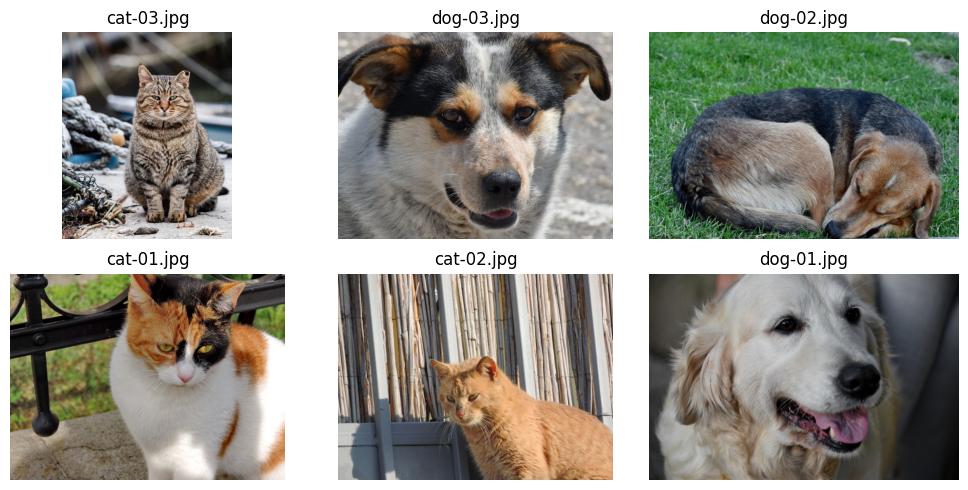

In [29]:
import matplotlib.pyplot as plt
import os
from PIL import Image

fig = plt.figure(figsize=(10,5))
for i, file in enumerate(file_list,1):
  img = Image.open(file)
  print('image shape:', np.array(img).shape)
  ax = fig.add_subplot(2,3,i)
  ax.imshow(img)
  ax.set_title(file.split('/')[-1])
  ax.set_axis_off()
plt.tight_layout()
plt.show()

In [30]:
# 라벨링 작업  dog 1  cat 0
labels = [  1 if 'dog' in file.split('/')[-1] else 0  for file in file_list]
labels

[0, 1, 1, 0, 0, 1]

기본 데이터셋 만들기

In [35]:
class ImageDataset(Dataset):
  def __init__(self,file_list, labels) -> None:
    self.file_list = file_list
    self.labels = labels
  def __getitem__(self, index):
    file = self.file_list[index]
    label = self.labels[index]
    return file,label
  def __len__(self):
    return len(self.labels)

image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
  print(file,label)

/content/cat_dog_images/cat-03.jpg 0
/content/cat_dog_images/dog-03.jpg 1
/content/cat_dog_images/dog-02.jpg 1
/content/cat_dog_images/cat-01.jpg 0
/content/cat_dog_images/cat-02.jpg 0
/content/cat_dog_images/dog-01.jpg 1


이미지 변환

In [37]:
import torchvision.transforms as transforms

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

img_height, img_width = 80, 120

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width), antialias=True),
])

image_dataset = ImageDataset(file_list, labels, transform)

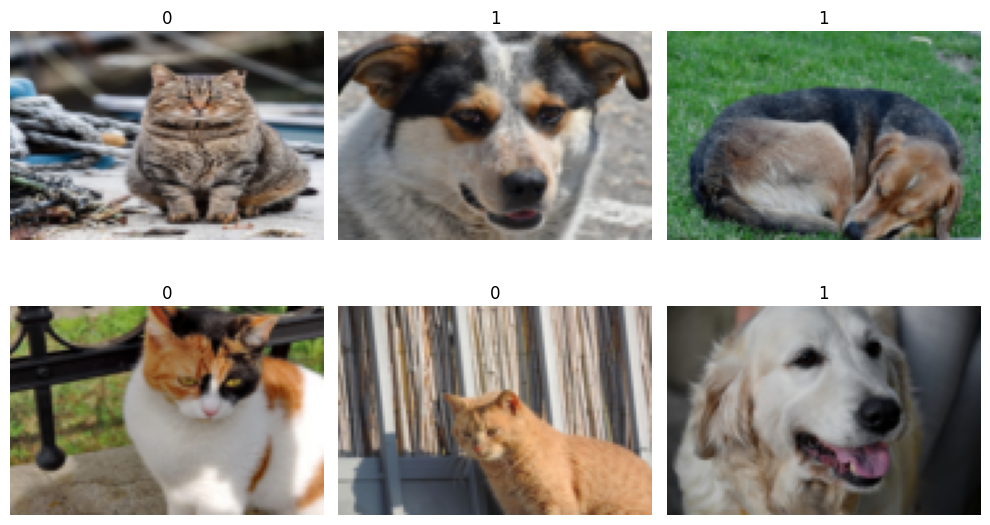

In [48]:
# Image.open('/content/cat_dog_images/dog-02.jpg')
fig = plt.figure(figsize=(10,6))
for i, (imgfile,label) in enumerate(image_dataset):
  ax = fig.add_subplot(2,3,i+1)
  ax.set_axis_off()
  # 부동소수점 오차 때문에 픽셀값이 0~1사이가 아니라는 맷플랏의 경고를 제거
  imgdata = imgfile.numpy().transpose((1,2,0))
  imgdata = (imgdata*255).astype(np.uint8)
  ax.imshow( imgdata )
  ax.set_title(label)

plt.tight_layout()
plt.show()

torchvision.datasets 로드

https://drive.google.com/file/d/0B7EVK8r0v71pZjFTYXZWM3FlRnM/view?usp=sharing&resourcekey=0-dYn9z10tMJOBAkviAcfdyQ



In [49]:
import torchvision

In [70]:
!unzip '/content/drive/MyDrive/data/img_align_celeba.zip' -d celeba

Archive:  /content/drive/MyDrive/data/img_align_celeba.zip
replace celeba/img_align_celeba/000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
n


In [60]:
from glob import glob
files = glob('/content/img_align_celeba/*')
files_ = glob('/content/img_align_celeba/*.jpg')
len(files), len(files_)

(202599, 202599)

In [62]:
!unzip '/content/drive/MyDrive/data/Anno-20240318T110035Z-001.zip'

Archive:  /content/drive/MyDrive/data/Anno-20240318T110035Z-001.zip
  inflating: Anno/list_bbox_celeba.txt  
  inflating: Anno/identity_CelebA.txt  
  inflating: Anno/list_landmarks_celeba.txt  
  inflating: Anno/list_landmarks_align_celeba.txt  
  inflating: Anno/list_attr_celeba.txt  


In [63]:
!mv Anno celeba

In [68]:
!mv img_align_celeba celeba

In [66]:
!cp /content/drive/MyDrive/data/list_eval_partition.txt celeba

In [69]:
len(glob('celeba/*.jpg')), len(glob('celeba/*'))


(0, 7)

In [75]:
glob('celeba/*')

['celeba/list_attr_celeba.txt',
 'celeba/identity_CelebA.txt',
 'celeba/list_bbox_celeba.txt',
 'celeba/list_landmarks_align_celeba.txt',
 'celeba/list_landmarks_celeba.txt',
 'celeba/img_align_celeba',
 'celeba/list_eval_partition.txt']

In [80]:
!mv celeba/img_align_celeba/* celeba/

/bin/bash: line 1: /usr/bin/mv: Argument list too long
